In [10]:
from pathlib import Path
import sys
sys.path.append('../bitome-kb/')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse as sparse
import seaborn as sns
from bitome.core import Bitome
from math import log,exp,inf
bitome = Bitome.init_from_file('../bitome-kb/bitome.pkl')

In [11]:
from feature_functions import *
from pymodulon.io import load_json_model
from pymodulon.visualization import *

# 1. Load shape data
* Unzip ecoli_U00096_shape.pickle.zip in data folder
* change file path to the path of ecoli_U00096_shape.pickle

In [12]:
shape_table = pd.read_pickle('../../K12DNA_structure/ecoli_U00096/ecoli_U00096_shape.pickle')

# 2. IM membership

In [4]:
import pymodulon

In [5]:
precise2 = load_json_model('../data/precise2.json.gz')
im_table = precise2.imodulon_table
regulatory_ims = im_table[im_table['regulator'].notna()]

In [6]:
regulatory_ims.head()

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,functional_category,annotation_category,imodulon_category,exp_var,trn_enrich_params,note
CysB-1,CysB,0.000000e+00,1.980000e-07,0.411765,0.225806,0.291667,7.0,17.0,31,1.0,NaN,Amino Acid Metabolism,Metabolism,Regulatory,0.964488,None,None
CueR/CusR/HprR,CueR/CusR/HprR,6.090000e-22,4.640000e-16,0.888889,0.727273,0.800000,8.0,9.0,11,3.0,NaN,Metal Homeostasis,Two-Component Systems,Regulatory,0.795047,None,None
YieP,YieP,2.720000e-17,0.000000e+00,1.000000,0.600000,0.750000,6.0,6.0,10,1.0,NaN,Membrane Homeostasis,Stress Responses,Regulatory,0.098174,None,None
PhoB-1,PhoB,1.190000e-17,0.000000e+00,0.191489,0.900000,0.315789,9.0,47.0,10,1.0,NaN,Phosphate Metabolism,Two-Component Systems,Regulatory,0.103377,None,None
Curli,BasR+Cra+Crp+CsgD+IHF+MlrA+OmpR+ppGpp+RcdA+Cpx...,0.000000e+00,NaN,1.000000,1.000000,1.000000,4.0,4.0,4,16.0,NaN,Extracellular Structures,Stress Responses,Regulatory,0.440961,used compute_regulon_enrichment,None


## Assessment of IM quality

Text(0, 0.5, 'precision / recall')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


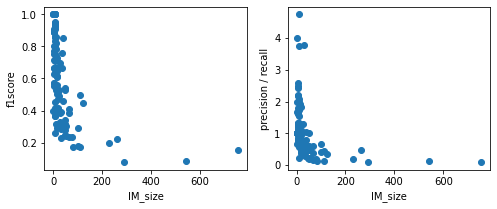

In [8]:
fig,axs = plt.subplots(1,2,figsize=(8,3))
axs[0].scatter(regulatory_ims['regulon_size'],regulatory_ims['f1score'])
axs[0].set_xlabel('IM_size')
axs[0].set_ylabel('f1score')
pre_d_rec = [ (regulatory_ims['precision'][i]/regulatory_ims['recall'][i]) for i in range(len(regulatory_ims['precision']))]
axs[1].scatter(regulatory_ims['regulon_size'],pre_d_rec)
axs[1].set_xlabel('IM_size')
axs[1].set_ylabel('precision / recall')

Text(0, 0.5, 'f1score')

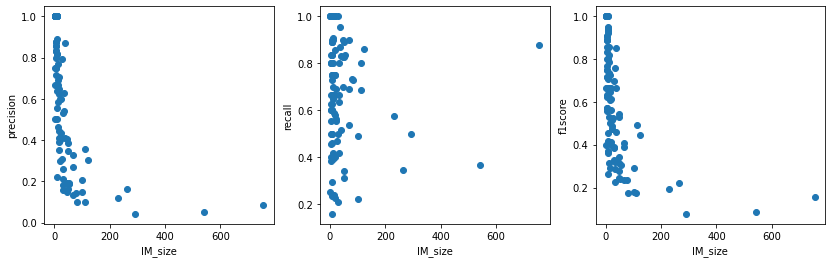

In [9]:
fig,axs = plt.subplots(1,3,figsize=(14,4))
axs[0].scatter(regulatory_ims['regulon_size'],regulatory_ims['precision'])
axs[0].set_xlabel('IM_size')
axs[0].set_ylabel('precision')
axs[1].scatter(regulatory_ims['regulon_size'],regulatory_ims['recall'])
axs[1].set_xlabel('IM_size')
axs[1].set_ylabel('recall')
axs[2].scatter(regulatory_ims['regulon_size'],regulatory_ims['f1score'])
axs[2].set_xlabel('IM_size')
axs[2].set_ylabel('f1score')

## Save IM information: size, name, genes, TFs associated

In [13]:
TRN = precise2.trn
TRN = TRN[TRN['evidence'].notna()]
im_names = list(regulatory_ims.index)
tf = list(regulatory_ims['regulator'] )

gene_list = []
im_size = []
for im in im_names:
    genes = list( precise2.view_imodulon(im).index )
    gene_list.append( genes )
    im_size.append( len(genes) )
    
p_im_db = pd.DataFrame( list(zip(im_names, tf, gene_list,im_size)), columns =['im_name', 'tf','genes','size'])
p_im_db.to_csv('../data/precise2_im_info.csv',index=None)

## Load IM membership

In [15]:
import ast
im_info = pd.read_csv('../data/precise2_im_info.csv')

In [16]:
IM_genes = {}
for i in range(len(im_info['im_name'])):
    IM_genes[im_info['im_name'][i]] = ast.literal_eval( im_info['genes'][i] )
IM_genes.keys()

dict_keys(['CysB-1', 'CueR/CusR/HprR', 'YieP', 'PhoB-1', 'Curli', 'Fnr-1', 'TdcAR/CadC', 'Fimbriae', 'UTP', 'Fnr+NarL', 'GalRS', 'BtsR', 'PyrR', 'PlaR', 'FhlA', 'RhaS', 'sokB/rdlD', 'NanR', 'FadR', 'NrdR', 'GlcC', 'BaeR+CpxR', 'NikR+Fnr+NarL', 'Isoleucine', 'PspF', 'OxyR', 'Tryptophan', 'CsqR', 'CueR', 'LldR+ArcA', 'Thiamine-1', 'PuuR', 'YcjW', 'NsrR', 'GntR', 'Fnr+NarLP', 'RcsAB', 'MalT', 'TyrR', 'Molybdopterin', 'Fnr-2', 'Suf System', 'AtoC', 'Leucine', 'SoxS', 'Translation', 'rdlC', 'RcnR', 'Lrp', 'Nac', 'KdpE', 'PhoB-2', 'RbsR+dsrA', 'CysB-2', 'FlhDC-1', 'Crp-1', 'ArgR', 'GadX', 'NtrC-1', 'XylR', 'ArcA', 'BirA', 'EvgA', 'BluR', 'asr', 'LsrR', 'ZntR/Zur/CueR', 'RpoE', 'Fur-1', 'PurR', 'ArgP', 'AllR/AraC/FucR', 'FucR/ExuR', 'Fur-2', 'Mlc', 'CecR', 'Fnr+IHF+gcvB', 'YgbI', 'ComR/FlhDC/SgrR', 'LexA', 'Cra', 'GlpR-1', 'flhDC', 'NtrC-2', 'Glyoxylate', 'PaaX', 'Spermidine', 'CdaR', 'PrpR+Cra', 'FliA', 'FecI', 'CpxR', 'Crp-2', 'Histidine', 'RpoH', 'GadE+FliZ', 'ComR/MarR', 'GcvA', 'GadEXW',

# 3. Load PSSMs

### Load Sigma PSSM

In [13]:
# reading the data from the file 
with open('data/sigma_pssm_ecoli.txt', 'rb') as handle: 
    data = handle.read()  
# reconstructing the data as dictionary 
d = pickle.loads(data)
M_prib = d['M_prib']
M_m35 = d['M_m35']
m10_seq = d['m10_seq']
m35_seq = d['m35_seq']

###  Load TF and IM motifs

In [14]:
pwm_db = rpwm('../data/motif_pwm_db.txt')
pwm_im = rlogodds('../data/motif_logodds.txt')
IM_motif_to_use = list( set(pwm_im.keys())&set(IM_genes.keys()) )

tf_genes = ['araC', 'arcA', 'argR','argP','baeR','basR','cysB', 'cpxR', 'cra',
       'crp', 'mlc','mqsA' ,'evgA', 'exuR', 'fadR','iclR','ihfA','ihfB','iscR','fhlA','flhD','flhC', 'fnr',
       'fur','gadE','gadW','gadX','galR','galS','gcvA', 'glpR','glrR','gntR', 'tyrR','lexA','leuO',
        'lrp', 'malT', 'metJ','nac', 'nagC','nanR' ,'narL','narP','nrdR','nsrR',
        'glnG','ompR','oxyR','pdhR','phoB','phoP','purR', 'puuR', 'rcsA','rcsB','rhaS','rutR','soxS', 'trpR', 'xylR','ydeO']

In [15]:
tf_list =['AraC', 'ArcA', 'ArgP', 'ArgR', 'BaeR', 'BasR', 'CysB', 'CpxR', 
          'Cra', 'CRP', 'Mlc', 'MqsA', 'EvgA', 'ExuR', 'FadR', 'IclR', 'IscR', 
          'IHF', 'FhlA', 'FlhDC', 'FNR', 'Fur', 'GadE', 'GadW', 'GadX', 'GalR', 'GalS', 
          'GcvA', 'GlpR', 'GlrR', 'GntR', 'TyrR', 'LexA', 'LeuO', 'Lrp', 'MalT', 'MetJ', 'Nac', 
          'NagC', 'NanR', 'NarL', 'NarP', 'NrdR', 'NsrR', 'NtrC', 'OmpR', 'OxyR', 'PdhR', 'PhoB', 'PhoP',
          'PurR', 'PuuR', 'RcsAB', 'RhaS', 'RutR', 'SoxS', 'TrpR', 'XylR', 'YdeO']

regulon_genes={}
for TF in bitome.transcription_factors:
    if TF.name in tf_list:
        regulon_genes[TF.name] = []   
        for r in TF.regulons:
                for p in list(r.regulated_promoters.values())[0]:
                    if p.transcription_unit != None and len(p.transcription_unit.genes)>0:
                        for g in p.transcription_unit.genes:
                            regulon_genes[TF.name].append( g.name)

In [16]:
# cobvert gene name and b number.
b_g = {}
for g in bitome.genes:
    b_g[g.name] = g.locus_tag

In [17]:
# test runtime
import timeit
start = timeit.default_timer()

gltX = bitome.transcription_units[220]
tempr= bitome.motif_match(pwm_im,  gltX,'Cra' , True, True)

stop = timeit.default_timer()

print('Time: ', stop - start) 
print(tempr)

Time:  4.935015899999996
{'Cra im Matched Motif': 'CAACGAAAACAATAATGCGTAAGGTAGAA', 'Cra im score': -531, 'Cra im upstreamTSS': 1, 'Cra im distToTSS': 16.0, 'Cra im HelT_avg': 34.78068965517242, 'Cra im HelT_range': 4.095000000000006, 'Cra im MGW_avg': 5.073448275862069, 'Cra im MGW_range': 2.3600000000000003, 'Cra im ProT_avg': -8.945862068965518, 'Cra im ProT_range': 12.99, 'Cra im Roll_avg': -0.5175862068965518, 'Cra im Roll_range': 6.425000000000001, 'Cra im HelT_max': 36.915000000000006, 'Cra im HelT_min': 32.82, 'Cra im MGW_max': 6.11, 'Cra im MGW_min': 3.75, 'Cra im ProT_max': -1.48, 'Cra im ProT_min': -14.47, 'Cra im Roll_max': 2.4800000000000004, 'Cra im Roll_min': -3.9450000000000003, 'Cra im HelT_peak_width': 1.594420590572675, 'Cra im HelT_num_peaks': 4, 'Cra im HelT_peak_dist': 8.333333333333334, 'Cra im Roll_peak_width': 2.9421339071868244, 'Cra im Roll_num_peaks': 4, 'Cra im Roll_peak_dist': 7.0, 'Cra im MGW_peak_width': 2.745880436770283, 'Cra im MGW_num_peaks': 4, 'Cra 

# 4. Generate feature matrix

In [ ]:
motif_feature = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None or int(tu.tss) < 200:
            continue
            
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        data['strand'] = int(tu.location.strand)
        data['TU_length'] = len(tu.sequence)
        
        # replication strand
        data['leading'] = 0
        data['lagging'] = 0
        data['terminus'] = 0
        data[ str(g.replication_strand) ] = 1
        
        #sigmulon features ( sigma 38 excluded )
        for signame in m10_seq.keys():
            result = bitome.score_pribnow_m35( tu, signame, M_prib, M_m35,m10_seq,m35_seq)
            result.pop(signame+'_Matched_Prib')
            result.pop(signame+'_Matched_m35')
            data.update( result )
            
        #USR and DSR
        data['USR_AT'] = bitome.USR_AT(tu)
        data['DSR_AG'] = bitome.DSR_AG(tu)
        
        #TF and IM motif features
        for tf in list(pwm_db.keys()):
            result = bitome.motif_match(pwm_db,  tu,  tf, False,False)
            result.pop(tf+' Matched Motif')
            data.update(result)
        
        for im in IM_motif_to_use:
            result = bitome.motif_match(pwm_im,  tu, im, True,False)
            result.pop(im +' im'+' Matched Motif')
            data.update(result)
        
        #distance features    
        for tg in tf_genes:
            data['distTo_'+tg] = bitome.inter_gene_distance(g,bitome.get_gene(tg))
            
        data['distToOrigin'] = g.origin_distance
        data['distToTer'] = g.terminus_distance
        data['Ori/(Ori+Ter)'] = g.origin_distance/(g.origin_distance+g.terminus_distance)
        data['orderInOperon'] = g.position_in_operon
        
        for tf in regulon_genes.keys():
            regulon_list = regulon_genes[tf]
            data['distTo_'+tf+'_regulated'] = bitome.distToRegulon(g, regulon_list )
        
        data.update( bitome.nucleotide_composition( tu ) )
        
        motif_feature.append(data)

In [ ]:
motif_data = pd.DataFrame(motif_feature)
motif_data.head()

### DNA shape at TSS
#### HelT	Roll	Shift	Slide	Rise	TilT	Buckle	Shear	Stretch	Stagger	Opening	MGW	ProT	EP	

In [ ]:
n_up = 40
n_down = 10

shape_feature = []
for g in bitome.genes:
    if len(g.transcription_units) < 1:
        continue
    
    for tu in g.transcription_units:
        if tu.tss == None or int(tu.tss) < 200:
            continue
        data = {}
        data['ID'] = g.locus_tag
        data['gene'] = g.name
        data['TU'] = tu.name
        TSS= tu.tss
        if int(tu.location.strand) == -1:
            start = TSS - n_up
            end = TSS + n_down
        else:
            start = TSS - n_down
            end= TSS + n_up
            
        table = get_shape(start,end,shape_table)
        helt =  list(table['HelT'])
        roll =  list(table['Roll'])
        mgw = list(table['MGW'])
        prot=  list(table['ProT'])
        slide = list(table['Slide'])
        stretch = list(table['Stretch'])
        stagger = list(table['Stagger'])
        opening = list(table['Opening'])
        ep = list(table['EP'])
        
        
        if tu.location.strand == -1:
            helt.reverse()
            mgw.reverse()
            prot.reverse()
            roll.reverse()
            slide.reverse()
            stretch.reverse()
            stagger.reverse()
            opening.reverse()
            ep.reverse()
            
        temp = {'HelT':helt, 'MGW':mgw,'ProT':prot, 'Roll':roll,'Slide':slide,
                'Stretch':stretch,'Stagger': stagger,'Opening':opening,'EP': ep}
        for shape in temp.keys():
            for i in range(51):
                index = i - 40
                data[shape+'_TSS_'+ str(index)] = temp[shape][i]
                
        shape_feature.append(data)

In [ ]:
shape_data = pd.DataFrame(shape_feature)
shape_data.head()

In [ ]:
data_table = pd.concat([motif_data, shape_data[shape_data.columns[3:]]], axis=1)
data_table.head()

In [ ]:
data_table.to_csv('../data/data.csv', index = None)

## Averaging  by genes

In [18]:
data_table = pd.read_csv('../data/data.csv')

In [19]:
unique_ids = np.unique(list(data_table['ID']))

multiple_ids = {}
for n in unique_ids:
    if list(data_table['ID']).count(n) > 1:
        multiple_ids[n] = list(data_table['ID']).count(n)

remove_list = []
length = len(data_table['ID'])
for i in range(length):
    if data_table.iloc[i,0] in multiple_ids.keys():
        remove_list.append(i)

single_features = data_table.drop(remove_list)
single_features = single_features.reset_index()
single_features = single_features.drop(columns=['index'])
single_features = single_features[['ID']+list(single_features.columns)[3:]]

In [20]:
featureList = list(single_features.columns)[1:]
multi = {}
for g in multiple_ids.keys():
    multi[g] = {}
    multi[g]['ID'] = str(g)
    for f in featureList:
        multi[g][f] = 0
        
for i in range(len(data_table['ID']) ):
    if data_table['ID'][i] in multiple_ids.keys():
        for f in featureList:
            multi[ str(data_table['ID'][i]) ][f] += float(data_table[f][i]/multiple_ids[str(data_table['ID'][i])])

In [21]:
multi_table = []
for k in multi.keys():
    multi_table.append(multi[k])
multi_pd = pd.DataFrame(multi_table)

In [22]:
avg_features = single_features.append(multi_pd)
avg_features=avg_features.reset_index()
avg_features=avg_features.drop(columns=['index'])
avg_features.head()

,ID,strand,TU_length,leading,lagging,terminus,Sigma70_Prib_Start,Sigma70_Prib_score,Sigma70_Prib_hmd,Sigma70_Prib_Tm,...,EP_TSS_1,EP_TSS_2,EP_TSS_3,EP_TSS_4,EP_TSS_5,EP_TSS_6,EP_TSS_7,EP_TSS_8,EP_TSS_9,EP_TSS_10
0,b0008,1.0,1040.0,1.0,0.0,0.0,-13.0,-4.060455,1.0,14.0,...,-7.41,-8.13,-8.79,-5.82,-7.34,-6.16,-8.05,-9.42,-8.51,-7.43
1,b0025,1.0,5897.0,1.0,0.0,0.0,-12.0,-3.290289,1.0,14.0,...,-6.70,-5.47,-7.24,-7.10,-6.78,-5.03,-4.86,-4.76,-5.10,-5.05
2,b0034,1.0,478.0,1.0,0.0,0.0,-13.0,-4.642584,2.0,14.0,...,-5.93,-5.99,-7.86,-7.47,-5.63,-7.57,-8.76,-8.97,-8.27,-5.64
3,b0035,-1.0,7920.0,0.0,1.0,0.0,-12.0,-5.778186,2.0,14.0,...,-8.38,-7.69,-6.76,-6.79,-7.65,-7.61,-7.47,-7.41,-8.29,-9.42
4,b0036,-1.0,7920.0,0.0,1.0,0.0,-12.0,-5.778186,2.0,14.0,...,-8.38,-7.69,-6.76,-6.79,-7.65,-7.61,-7.47,-7.41,-8.29,-9.42


In [23]:
avg_features.to_csv('../data/features_avg.csv',index=None)

# 5. assess motif quality by t-test

In [24]:
from scipy.stats import ttest_ind

In [25]:
im_motif_ttest=[]
for name in IM_motif_to_use:
    d={}
    d['IM'] = name
    temp = []
    for i in range(len(data_table['ID'])):
        if data_table['ID'][i] in IM_genes[name]:
            temp.append(data_table[ name+ ' im score'][i])
    
    if len(temp) == 0:
        continue
        
    d['IM avg score'] = sum(temp)/len(temp)
    d['avg score'] = sum(data_table[name+ ' im score'])/len(data_table[name+ ' im score'])
    d['p value'] = ttest_ind(temp, list(data_table[name+ ' im score'])).pvalue 
    im_motif_ttest.append(d)

pvalueTable = pd.DataFrame(im_motif_ttest)
pvalueTable = pvalueTable.dropna()
pvalueTable = pvalueTable.sort_values(by=['p value'])
pvalueTable = pvalueTable.reset_index()
pvalueTable = pvalueTable.drop(columns=['index'])
pvalueTable

,IM,IM avg score,avg score,p value
0,Lrp,1892.048780,-302.338962,2.689605e-105
1,ArgP,1947.181818,-512.361063,2.213739e-103
2,Cra,2139.400000,-1578.247331,5.696442e-91
3,MetJ,859.750000,-4839.809784,3.942486e-84
4,PurR-1,1089.700000,-2754.147753,4.098817e-75
5,Fur-2,1042.756098,-2141.906630,4.107295e-71
6,Nac,1683.909091,-147.677427,1.800089e-69
7,CpxR,1237.000000,207.219767,1.448529e-65
8,TyrR,2597.692308,-2450.497641,2.263764e-63
9,Fur-1,1021.482759,-2055.628508,2.855673e-45


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


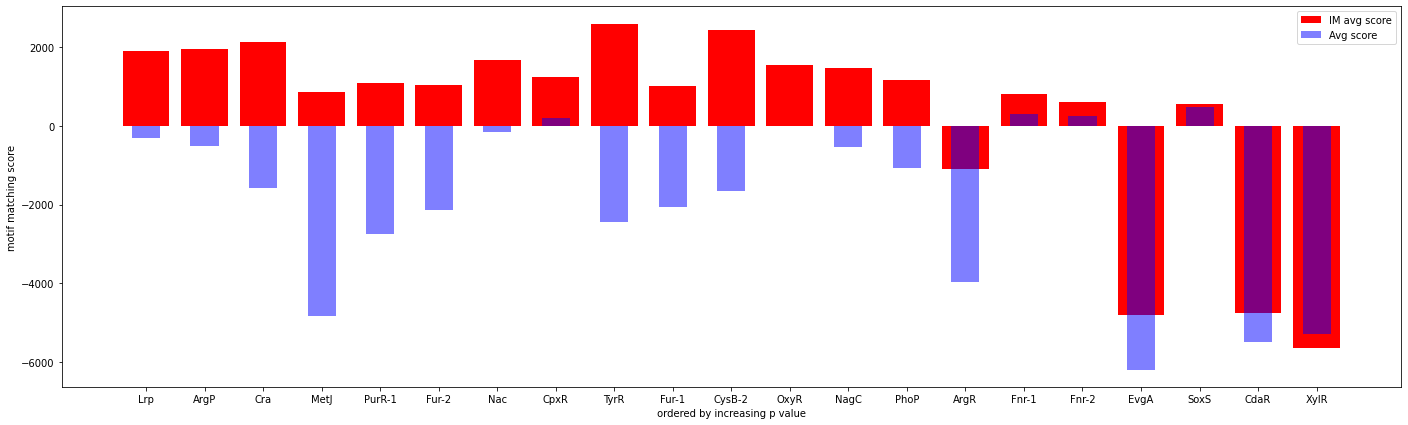

In [26]:
plt.figure(figsize=(24,7))
plt.bar(list(pvalueTable['IM']), list(pvalueTable['IM avg score']), width=0.8, 
        color='r', label='IM avg score')

plt.bar( list(pvalueTable['IM']), list(pvalueTable['avg score']), 
        width=0.6*0.8, color='b', alpha=0.5, label='Avg score')

plt.xticks( list(pvalueTable['IM']) )
plt.ylabel('motif matching score')
plt.xlabel(' ordered by increasing p value ')
plt.legend()
plt.show()

In [27]:
tf_motif_ttest=[]
for name in pwm_db.keys():
    if name == 'Crp':
        tfname = 'CRP'
    elif name == 'Fnr':
        tfname = 'FNR'
    else:
        tfname = name
    d={}
    d['TF'] = name    
    temp = []
    for i in range(len(data_table['gene'])):
        if data_table['gene'][i] in regulon_genes[tfname]:
            temp.append(data_table[name+' score'][i])
    d['Regulon avg score'] = sum(temp)/len(temp)
    d['avg score'] = sum(data_table[name+' score'])/len(data_table[name+' score'])
    d['p value'] = ttest_ind(temp, list(data_table[name+' score'])).pvalue 
    tf_motif_ttest.append(d)
    
pvalTable = pd.DataFrame(tf_motif_ttest)
pvalTable = pvalTable.dropna()
pvalTable = pvalTable.sort_values(by=['p value'])
pvalTable = pvalTable.reset_index()
pvalTable = pvalTable.drop(columns=['index'])
pvalTable

,TF,Regulon avg score,avg score,p value
0,Mlc,17.208000,-1.370723,1.252569e-127
1,PurR,9.592683,-1.242960,1.012670e-106
2,NarP,8.159459,2.757785,5.709479e-97
3,BaeR,17.822222,0.684629,4.525441e-78
4,NarL,5.962424,3.590365,6.727302e-75
5,Fur,5.546277,1.310082,1.141213e-72
6,Crp,5.633333,3.745791,7.547461e-70
7,FadR,7.973529,0.894140,3.568757e-57
8,RutR,7.767857,1.281897,1.477410e-51
9,EvgA,5.987879,-1.298808,6.578273e-48


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


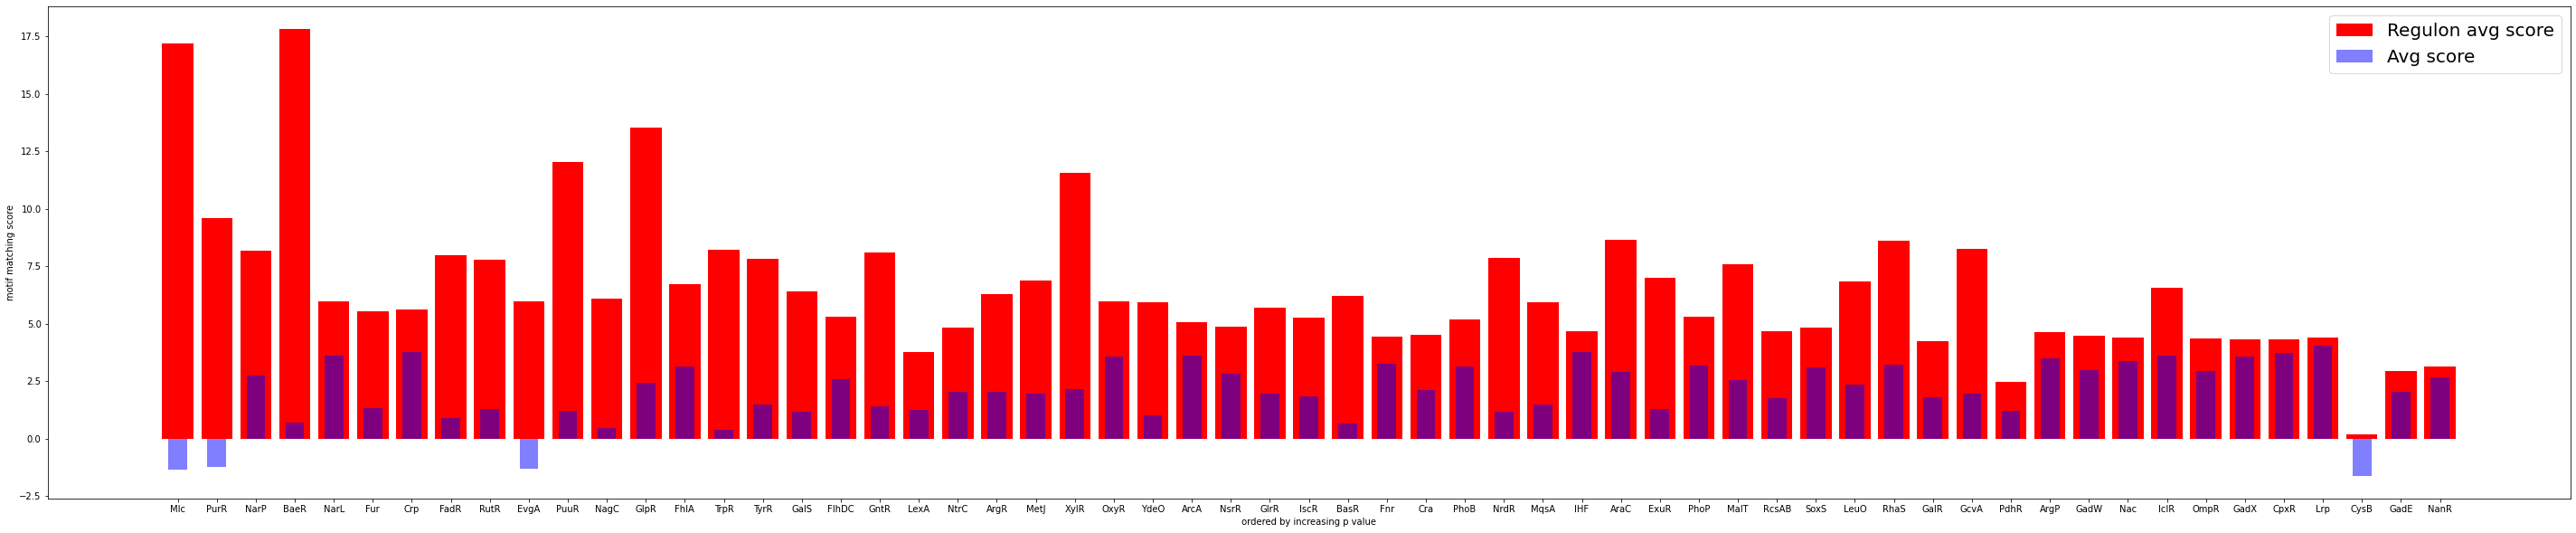

In [28]:
plt.figure(figsize=(50,10))
plt.bar(list(pvalTable['TF']), list(pvalTable['Regulon avg score']), width=0.8, 
        color='r', label='Regulon avg score')

plt.bar( list(pvalTable['TF']), list(pvalTable['avg score']), 
        width=0.6*0.8, color='b', alpha=0.5, label='Avg score')

plt.xticks( list(pvalTable['TF']) )
plt.ylabel('motif matching score')
plt.xlabel(' ordered by increasing p value ')
plt.legend(fontsize = 20)
plt.show()